# U.S. Medical Insurance Costs

Project Author: <b>Markus J. (vikemarkus on codecademy)</b>

<H1>Main Objective</H1>
The main objective of this project is to determine whether there is a <b>"causal relationship between the sex and the insurance cost of a person"</b>. To evaluate this, we have to be critical of the dataset and find a way to eliminate the impact of other factors.

<b>PS!</b> To be clear, we are only able to factor in and eliminate the effect of the other variables provided in the given dataset. This means that the final numbers will be just as accurate as this dataset allows them to be. If there are any other factors (there most definitely are) but they are not accounted for in this dataset, we won't be able to account for them.

We will do this by iterating through the dataset and filtering out the highest possible number of datapoints that share common cost-determining variable (except the sex) - this will allow us to look at the sex of a person and evaluate causal relationship in a meaningful way.

<h2>Gameplan</h2>
<b>1.</b> Importing all data from the csv file and dividing the column values into lists for later access. 

<b>2.</b> Filter out the non-smokers for final objective dataset. <b>(Side Objective)</b> Determine if smoking has an effect on the insurance cost.

<b>3. </b> Filter by region for final objective dataset.

<b>4. </b> Filter BMI for final objective dataset. <b>(Side Objective)</b> BMI Effect on insurance cost.

<b>5. </b> Filter Children for final objective dataset.

<b>6. (Main Objective)</b> Determine whether there is a causal effect between sex and insurance cost.

<b>7. </b> The Results

<H1>---------</H1>

<H1>1. Importing data</H1>

In [123]:
import csv



In [124]:
with open("insurance.csv") as insurance_file:
    insurance_csv = csv.DictReader(insurance_file)
    data = [row for row in insurance_csv]

In [125]:
ages = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

In [126]:
for element in data:
    ages.append(element["age"])
    sex.append(element["sex"])
    bmi.append(element["bmi"])
    children.append(element["children"])
    smoker.append(element["smoker"])
    region.append(element["region"])
    charges.append(element["charges"])

<H1>2. Smoking has an effect on the insurance cost.</H1>
Determining the effects of smoking/not smoking on insurance cost - since the list has more non-smokers than smokers, we have to find the avg nonsmokers cost separately

In [127]:
#determining the effects of smoking/not smoking on insurance cost - since the list has more non-smokers than smokers, we have to find the avg nonsmokers cost separately
non_smoker_cost = 0
non_smoker_amount = 0
smoker_cost = 0
smoker_amount = 0
index = 0

for element in smoker:
    if element == "yes":
        smoker_cost += float(charges[index])
        smoker_amount += 1
    else:
        non_smoker_cost += float(charges[index])
        non_smoker_amount += 1
    index += 1

avg_cost_difference = (smoker_cost / smoker_amount) - (non_smoker_cost / non_smoker_amount)
print(non_smoker_cost)
print(non_smoker_amount)
print(smoker_amount)
print(smoker_cost)
print("A smoker's insurance cost is " + str(round(avg_cost_difference,2)) + " higher than a non-smoker's on average.")

8974061.468918996
1064
274
8781763.52184
A smoker's insurance cost is 23615.96 higher than a non-smoker's on average.


In [128]:
#determine to see whether the Sex of a person is in direct CAUSAL relationship to the insurance cost
#to determine causal relationship as accurately as possible, we have to minimize the effect of other variables

sex_to_cost_data_set_indexes = [] # list of the datapoint indexes we will include in the final dataset

#1. let's choose only non-smokers because most of the people in the dataset are non-smokers.
index = 0
for element in smoker:
    if element == "no":
        sex_to_cost_data_set_indexes.append(index)
    else:
        pass
    index += 1




<H1>3. Divide the dataset by regions</H1>
We'll see which region has more people and we'll select that to move forward.

In [129]:
#3. divide the dataset by regions - we'll see which region has more people and we'll select that to move forward.

north_east_num = 0
south_east_num = 0
north_west_num = 0
south_west_num = 0

for element in region:
    if element == "northeast":
        north_east_num += 1
    elif element == "southeast":
        south_east_num += 1
    elif element == "northwest":
        north_west_num += 1
    else:
        south_west_num += 1

print("North east: " + str(north_east_num))
print("South east: " + str(south_east_num))
print("North west: " + str(north_west_num))
print("South west: " + str(south_west_num))
        
#South East has most datapoints, let's proceed with that. Now let's update the main index list to only include people from this region.
index = 0

for element in region:
    if element == "southeast":
        if index in sex_to_cost_data_set_indexes:
            pass
    else:
        if index in sex_to_cost_data_set_indexes:
            sex_to_cost_data_set_indexes.remove(index)
        else:
            pass
    index += 1

North east: 324
South east: 364
North west: 325
South west: 325


In [130]:
#Lets calculate the avg ages to see if they make a difference on average
index = 0
female_ages = 0
female_num = 0
male_ages = 0
male_num = 0

for element in sex:
    if element == "female":
        female_ages += int(ages[index])
        female_num += 1
    else:
        male_ages += int(ages[index])
        male_num += 1
    index += 1

avg_male = female_ages / female_num
avg_female = male_ages / male_num

print("Avg female age: " + str(avg_female))
print("Avg male age: " + str(avg_male))

#Statistical insignificance is 5 percent.
stat_insignificance = 5*(avg_female+avg_male)/2/100
difference = avg_male-avg_female
if difference < stat_insignificance:
    print("Difference is less than 5% (" + str(difference) + " < " + str(stat_insignificance) + "), ages don't have to be accounted for.")
else:
    print("Difference is more than 5%, we have to account for ages.")

Avg female age: 38.917159763313606
Avg male age: 39.503021148036254
Difference is less than 5% (0.5858613847226479 < 1.9605045227837465), ages don't have to be accounted for.


<H1>4. BMI effect on Insurance Cost</H1>
Let's determine as accurately as possible whether BMI has any effect and if, how big of an effect on the cost of insurance.
To minimize the effect of other variables, let's use the smaller but more precise dataset <b>sex_to_cost_data_set_indexes</b>

(0.0, 50000.0)

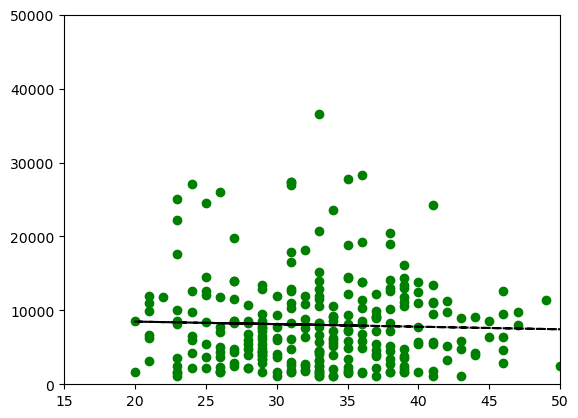

In [131]:
#Let's determine as accurately as possible whether BMI has any effect and if, how big of an effect on the cost of insurance.
#To minimize the effect of other variables, let's use the smaller but more precise dataset sex_tosex_to_cost_data_set_indexes
fixed_bmi_list = []
fixed_cost_list = []
final_bmi_list = []
final_cost_list = []

for index in sex_to_cost_data_set_indexes:
    fixed_bmi_list.append(bmi[index])
    fixed_cost_list.append(charges[index])


import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
for x in fixed_bmi_list:
    x = float(x)
    x = int(x)
    final_bmi_list.append(x)
for x in fixed_cost_list:
    x = float(x)
    x = int(x)
    final_cost_list.append(x)
    
x = final_bmi_list
y = final_cost_list
#fig, ax = plt.subplots()
#plt.scatter(fixed_bmi_list,fixed_cost_list)
#plt.show()
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'go', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'go' = green circle marker

plt.xlim(15, 50)
plt.ylim(0, 50000)
#The black dashed line which represents the potential linear relationship between the BMI and the Insurance Cost.

<H3>Conclusion</H3>
The change in BMI has no significant effect on the Insurance Cost. This is illustrated by the black dashed line. As we increase the BMI (x-axis), the Insurance Cost(y-axis) stays roughly the same over all the cases.

<H1>5. Children impact on Insurance Cost</H1>
Now, let's determine how the amount of children affects the Insurance Cost.
Lets divide the people in our corrected sex_to_cost_data_set_indexes list into groups based on the number of children.

In [132]:
#Finally, let's determine how the amount of children affects the Insurance Cost.
#Lets divide the people in our corrected sexsex_to_cost_data_set_indexes list into groups based on the number of children.

no_children_indexes = []
one_child_indexes = []
two_child_indexes = []
three_child_indexes = []
four_child_indexes = []
five_child_indexes = []

for index in sex_to_cost_data_set_indexes:
    if children[index] == "0":
        no_children_indexes.append(index)
    elif children[index] == "1":
        one_child_indexes.append(index)
    elif children[index] == "2":
        two_child_indexes.append(index)
    elif children[index] == "3":
        three_child_indexes.append(index) 
    elif children[index] == "4":
        four_child_indexes.append(index)
    else:
        five_child_indexes.append(index)

print(len(no_children_indexes))
print(len(one_child_indexes))
print(len(two_child_indexes))
print(len(three_child_indexes))
print(len(four_child_indexes))
print(len(five_child_indexes))

117
73
48
24
5
6


In [133]:
#Let's find the average cost of insurance for a person in every children group

no_avg = 0
one_avg = 0
two_avg = 0
three_avg = 0
four_avg = 0
five_avg = 0

for index in no_children_indexes:
    no_avg += float(charges[index]) #We'll calculate the totals first, dividing by the number of cases comes after the for loop
no_avg = no_avg / len(no_children_indexes)

for index in one_child_indexes:
    one_avg += float(charges[index])
one_avg = one_avg / len(one_child_indexes)

for index in two_child_indexes:
    two_avg += float(charges[index])
two_avg = two_avg / len(two_child_indexes)

for index in three_child_indexes:
    three_avg += float(charges[index])
three_avg = three_avg / len(three_child_indexes)

for index in four_child_indexes:
    four_avg += float(charges[index])
four_avg = four_avg / len(four_child_indexes)

for index in five_child_indexes:
    five_avg += float(charges[index])
five_avg = five_avg / len(five_child_indexes)

print("Avg cost to person with no children: " + str(no_avg))
print("Avg cost to person with 1 child: " + str(one_avg))
print("Avg cost to person with 2 children: " + str(two_avg))
print("Avg cost to person with 3 children: " + str(three_avg))
print("Avg cost to person with 4 children: " + str(four_avg))
print("Avg cost to person with 5 children: " + str(five_avg))

Avg cost to person with no children: 7060.081926666668
Avg cost to person with 1 child: 8016.476171780822
Avg cost to person with 2 children: 7519.504892291664
Avg cost to person with 3 children: 11986.612601666668
Avg cost to person with 4 children: 14451.023972
Avg cost to person with 5 children: 10115.441541666665


In [134]:
#The group with no children has the most datapoints in it (117). Let's take use this as the final way to develop a good dataset
#for determining the causal relationship between the sex of a person and their insurance cost.
final_data_set_indexes = []

for index in no_children_indexes:
    if index in sex_to_cost_data_set_indexes:
        final_data_set_indexes.append(index)
    else:
        pass

print(final_data_set_indexes)

[5, 13, 22, 48, 68, 77, 90, 97, 108, 116, 118, 135, 151, 170, 181, 190, 192, 194, 206, 217, 219, 226, 227, 236, 246, 247, 257, 293, 313, 336, 354, 358, 359, 374, 382, 386, 397, 399, 406, 416, 442, 470, 478, 479, 482, 491, 511, 521, 523, 525, 533, 534, 539, 542, 551, 557, 576, 594, 600, 605, 614, 632, 652, 654, 663, 672, 673, 687, 700, 702, 743, 753, 781, 789, 790, 801, 804, 808, 815, 822, 866, 872, 898, 903, 915, 928, 939, 940, 944, 974, 976, 979, 997, 1057, 1058, 1060, 1097, 1103, 1105, 1138, 1142, 1166, 1172, 1197, 1216, 1222, 1228, 1243, 1244, 1248, 1254, 1280, 1292, 1305, 1317, 1322, 1335]


<H1>6. Main Objective - Causal connection between SEX and COST</H1>

In [145]:
#Finally, lets determine if there is a causal connection.

male_avg = 0
male_indexes = []
female_avg = 0
female_indexes = []

for index in final_data_set_indexes:
    if sex[index] == "male":
        male_avg += float(charges[index])
        male_indexes.append(index)
    else:
        female_avg += float(charges[index])
        female_indexes.append(index)
        
male_avg = male_avg / len(male_indexes)
female_avg = female_avg / len(female_indexes)
diff_avg = female_avg-male_avg
diff_perc = diff_avg * 100 / male_avg
print(diff_avg)
print("Avg cost for a male person is: " + str(male_avg))
print("Avg cost for a female person is: " + str(female_avg))
print("Avg cost for a female person is " + str(round(diff_perc,0)) + "% larger than that for a man")

1338.9523779210522
Avg cost for a male person is: 6407.771793833334
Avg cost for a female person is: 7746.724171754387
Avg cost for a female person is 21.0% larger than that for a man


<H1>7. The Results</H1>
Based on the calculations we can see that there is an obvious causal connection between the sex of a person and their insurance cost. The average insurance cost for females is <b>21%</b> or <b>1339$</b> more than for males of the same demographic.